In [1]:
import tensorflow as tf
from tensorflow import keras

In [2]:
print(tf.__version__)

2.0.0


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
mnist = keras.datasets.fashion_mnist

In [8]:
type(mnist)

module

In [13]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [15]:
X_train.shape, y_train.shape

((60000, 28, 28), (60000,))

In [16]:
np.max(X_train)

255

In [17]:
np.mean(X_train)

72.94035223214286

In [18]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [19]:
class_names = ['top', 'trouser', 'pullover', 'dress', 'coat', 'sandal', 'shirt', 'sneaker', 'bag', 'ankle boot']

### Data Exploration

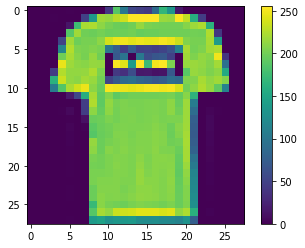

In [21]:
plt.figure()
plt.imshow(X_train[1])
plt.colorbar()

In [22]:
X_train = X_train/255.0
X_test = X_test/255.0

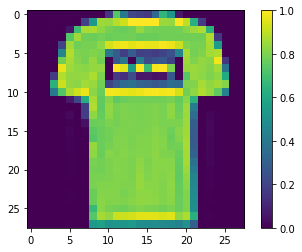

In [23]:
plt.figure()
plt.imshow(X_train[1])
plt.colorbar()

### Build the model with TF 2.0

In [24]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense

In [25]:
model = Sequential()
model.add(Flatten(input_shape=(28, 28)))
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [27]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


### model compilation
#### Loss Function
#### Optimizer
#### Metrics

In [28]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics = ['accuracy'])

In [29]:
history = model.fit(X_train, y_train, epochs=10, batch_size=10, validation_split=0.2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 9s 188us/sample - loss: 0.4980 - accuracy: 0.8226 - val_loss: 0.4365 - val_accuracy: 0.8401
Epoch 2/10
48000/48000 [==============================] - 9s 194us/sample - loss: 0.3772 - accuracy: 0.8637 - val_loss: 0.3850 - val_accuracy: 0.8598
Epoch 3/10
48000/48000 [==============================] - 9s 185us/sample - loss: 0.3392 - accuracy: 0.8748 - val_loss: 0.3569 - val_accuracy: 0.8735
Epoch 4/10
48000/48000 [==============================] - 9s 190us/sample - loss: 0.3174 - accuracy: 0.8830 - val_loss: 0.3775 - val_accuracy: 0.8651
Epoch 5/10
48000/48000 [==============================] - 8s 177us/sample - loss: 0.2975 - accuracy: 0.8906 - val_loss: 0.3616 - val_accuracy: 0.8738
Epoch 6/10
48000/48000 [==============================] - 9s 185us/sample - loss: 0.2830 - accuracy: 0.8945 - val_loss: 0.3364 - val_accuracy: 0.8827
Epoch 7/10
48000/48000 [==========================

In [30]:
from sklearn.metrics import accuracy_score

In [31]:
y_pred = model.predict_classes(X_test)

In [32]:
accuracy_score(y_test, y_pred)

0.8785

In [33]:
pred = model.predict(X_test)

In [35]:
pred[0]

array([4.5608527e-11, 2.5512109e-10, 2.3678988e-12, 2.2952249e-09,
       2.2545970e-11, 1.1489480e-05, 5.8576394e-10, 2.2942888e-02,
       4.4238873e-11, 9.7704566e-01], dtype=float32)

In [36]:
np.argmax(pred[0])

9

In [37]:
np.argmax(pred[1])

2

### Plotting Learning Curve and Confusion Matrix in TensorFlow 2.0

In [38]:
history.history

{'loss': [0.49798468476432994,
  0.3772445078021944,
  0.3392195841295688,
  0.31739848815336397,
  0.2975012606739862,
  0.28300198961796924,
  0.2708295406837472,
  0.26017100148773653,
  0.24994625626430814,
  0.2439673036887399],
 'accuracy': [0.822625,
  0.8637292,
  0.8747708,
  0.8830208,
  0.8905625,
  0.8945208,
  0.8994375,
  0.9029375,
  0.90641665,
  0.90879166],
 'val_loss': [0.4365109819561864,
  0.3849964252494586,
  0.3569237037667578,
  0.37753724649029513,
  0.361584667431307,
  0.3363751389247773,
  0.3545580483359906,
  0.3637113611198341,
  0.3559553205737999,
  0.33602383696391674],
 'val_accuracy': [0.84008336,
  0.85983336,
  0.8735,
  0.86508334,
  0.87383336,
  0.88266665,
  0.87583333,
  0.8725833,
  0.8743333,
  0.88441664]}

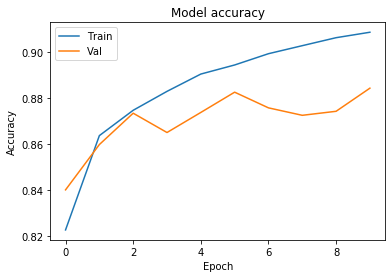

In [40]:
# Plt training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

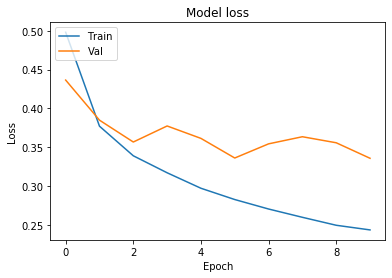

In [41]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()